In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\alenp\Downloads\Innmoatics\7\reviews_data_dump\reviews_badminton\data.csv')
data

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## **Feature Engineering & EDA**

In [3]:
data_cleaned = data.dropna(subset = ['Review text'])
data_cleaned

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5


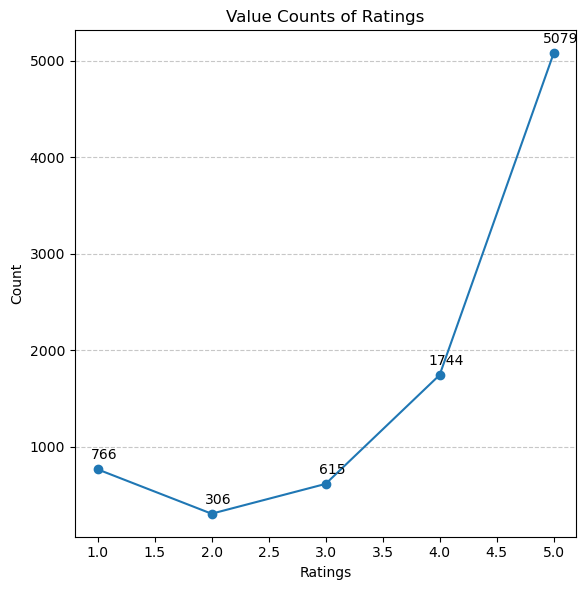

In [4]:
rating_count = data_cleaned['Ratings'].value_counts()
rating_count
plt.figure(figsize=(6, 6))
rating_count.sort_index().plot(marker='o', linestyle='-')
plt.title('Value Counts of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for rating, count in rating_count.sort_index().items():
    plt.annotate(str(count), xy=(rating, count), xytext=(5, 5), 
                 textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
from wordcloud import WordCloud

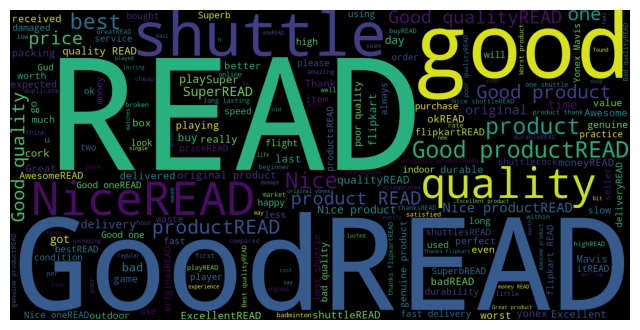

In [6]:
wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data_cleaned['Review text']))
import matplotlib.pyplot as plt

plt.figure(1,figsize=(8,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [7]:
data_cleaned['Sentiment'] = data_cleaned['Ratings'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

C:\Users\alenp\AppData\Local\Temp\ipykernel_19520\4248521832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sentiment'] = data_cleaned['Ratings'].apply(lambda x: 'Positive' if x > 3 else 'Negative')


In [8]:
data_cleaned

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Negative
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
...,...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3,Negative
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4,Positive
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5,Positive
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5,Positive


In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
  data_cleaned['Review text'], data_cleaned['Sentiment'], test_size=0.2, random_state=42
)

## **Preprocessing**

In [10]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [11]:
def clean_lem(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [12]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import f1_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [13]:
print("Training Set:")
print(X_train.info())
print(y_train.info())
print("\nTesting Set:")
print(X_test.info())
print(y_test.info())

Training Set:
<class 'pandas.core.series.Series'>
Int64Index: 6808 entries, 1372 to 7270
Series name: Review text
Non-Null Count  Dtype 
--------------  ----- 
6808 non-null   object
dtypes: object(1)
memory usage: 106.4+ KB
None
<class 'pandas.core.series.Series'>
Int64Index: 6808 entries, 1372 to 7270
Series name: Sentiment
Non-Null Count  Dtype 
--------------  ----- 
6808 non-null   object
dtypes: object(1)
memory usage: 106.4+ KB
None

Testing Set:
<class 'pandas.core.series.Series'>
Int64Index: 1702 entries, 4392 to 2221
Series name: Review text
Non-Null Count  Dtype 
--------------  ----- 
1702 non-null   object
dtypes: object(1)
memory usage: 26.6+ KB
None
<class 'pandas.core.series.Series'>
Int64Index: 1702 entries, 4392 to 2221
Series name: Sentiment
Non-Null Count  Dtype 
--------------  ----- 
1702 non-null   object
dtypes: object(1)
memory usage: 26.6+ KB
None


In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [15]:
from joblib import Memory
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)


# Define a pipeline for text preprocessing and classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=clean_lem)),
    ('sampler', SMOTE(sampling_strategy=0.5)),
    ('clf', LogisticRegression(max_iter=1000))
], memory=memory)
pipeline.fit(X_train, y_train)

Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function clean_lem at 0x000001E1F6C2A5C0>)),
                ('sampler', SMOTE(sampling_strategy=0.5)),
                ('clf', LogisticRegression(max_iter=1000))])

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
# Define hyperparameters for tuning
param_grid = [
    { 
    'tfidf__max_features': [100, 500, 1000],  # Maximum number of features for TF-IDF
    'clf__C': [0.1, 1, 10], 
    'clf__penalty': ['elasticnet'], 
    'clf__l1_ratio': [0.4, 0.5, 0.6],
    'clf__solver': ['saga'],
    'clf__class_weight': ['balanced']}
]

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
%time grid_search.fit(X_train, y_train)

CPU times: total: 2min 43s
Wall time: 4min 29s


GridSearchCV(cv=5,
             estimator=Pipeline(memory=Memory(location=.cache\joblib),
                                steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function clean_lem at 0x000001E1F6C2A5C0>)),
                                       ('sampler',
                                        SMOTE(sampling_strategy=0.5)),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=[{'clf__C': [0.1, 1, 10],
                          'clf__class_weight': ['balanced'],
                          'clf__l1_ratio': [0.4, 0.5, 0.6],
                          'clf__penalty': ['elasticnet'],
                          'clf__solver': ['saga'],
                          'tfidf__max_features': [100, 500, 1000]}],
             scoring='f1_macro')

In [17]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,accuracy_score
print("Tuned Model Accuracy:", accuracy_score(y_test, y_test_pred))
print("Tuned Model Classification Report:\n", classification_report(y_test, y_test_pred))

Tuned Model Accuracy: 0.8319623971797885
Tuned Model Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.68      0.61       337
    Positive       0.92      0.87      0.89      1365

    accuracy                           0.83      1702
   macro avg       0.74      0.77      0.75      1702
weighted avg       0.85      0.83      0.84      1702



In [19]:
# Get the best estimator
best_estimator = grid_search.best_estimator_
print("Best Estimator:", best_estimator)
print('Score on Train Data: ', grid_search.score(X_train, y_train))
print('Score on Test Data: ', grid_search.score(X_test, y_test))

Best Estimator: Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 preprocessor=<function clean_lem at 0x000001E1F6C2A5C0>)),
                ('sampler', SMOTE(sampling_strategy=0.5)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    max_iter=1000, penalty='elasticnet',
                                    solver='saga'))])
Score on Train Data:  0.8392661243583375
Score on Test Data:  0.7535586197678823


In [20]:
import joblib

joblib.dump(best_model, 'log_reg.joblib')

['log_reg.joblib']

In [21]:
log_reg = joblib.load('log_reg.joblib')
Text_example = ["hate it"]
prediction = log_reg.predict(Text_example)
prediction

array(['Negative'], dtype=object)

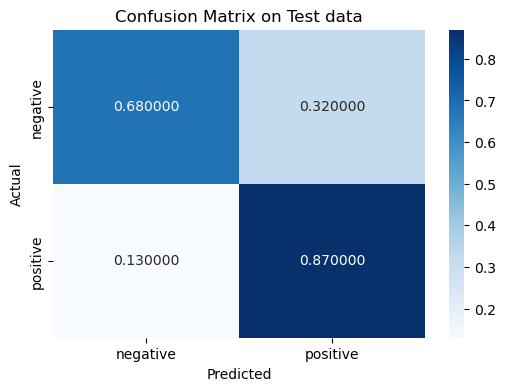

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='2f', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix on Test data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Using Random Classifier**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [24]:


# Replace MLPClassifier with RandomForestClassifier in the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=clean_lem)),
    ('rf', RandomForestClassifier())  # Use RandomForestClassifier instead of MLPClassifier
], memory = memory)

In [25]:
parameters = {
    'tfidf__ngram_range': [(1, 1),(1, 2), (1, 3)],
    'rf__n_estimators': [50, 80, 100],  
    'rf__max_depth': [None, 10, 20, 30],
}

%time grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='f1_macro')
%time grid_search.fit(X_train, y_train)



CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 10min 26s
Wall time: 15min 37s


GridSearchCV(cv=5,
             estimator=Pipeline(memory=Memory(location=.cache\joblib),
                                steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function clean_lem at 0x000001E1F6C2A5C0>)),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__n_estimators': [50, 80, 100],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='f1_macro')

In [26]:
best_model = grid_search.best_estimator_
y_test_tuned = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_test_tuned))
print("Model Classification Report on test:\n", classification_report(y_test, y_test_tuned))

Tuned Model Accuracy: 0.8736780258519389
Model Classification Report on test:
               precision    recall  f1-score   support

    Negative       0.80      0.48      0.60       337
    Positive       0.88      0.97      0.92      1365

    accuracy                           0.87      1702
   macro avg       0.84      0.73      0.76      1702
weighted avg       0.87      0.87      0.86      1702



In [27]:
print('Score on Train Data Using Random Classifier: ', grid_search.score(X_train, y_train))
print('Score on Test Data Using Random Classifier:: ', grid_search.score(X_test, y_test))

Score on Train Data Using Random Classifier:  0.9239626131639747
Score on Test Data Using Random Classifier::  0.7637458736392613


In [28]:
import joblib
joblib.dump(best_model, 'Random_Classifier.joblib')

['Random_Classifier.joblib']

In [29]:
model = joblib.load('Random_Classifier.joblib')
Text_example = ["I hate the product "]

In [30]:
prediction = model.predict(Text_example)
print("Prediction:", prediction)

Prediction: ['Positive']


In [31]:
vectorizer = pipeline['tfidf']
joblib.dump(vectorizer, 'MLP_classifier.joblib')

['MLP_classifier.joblib']

## **MLP Classifier**

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [33]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=clean_lem)),  # Specify the preprocessor function
    ('scaler', StandardScaler(with_mean=False)),  # Apply scaling to TF-IDF matrix
    ('mlp', MLPClassifier(max_iter=1000, early_stopping=True)), 
], memory = memory)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function clean_lem at 0x000001E1F6C2A5C0>)),
                ('scaler', StandardScaler(with_mean=False)),
                ('mlp', MLPClassifier(early_stopping=True, max_iter=1000))])

In [34]:
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

Accuracy: 0.854876615746181
Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.49      0.57       337
    Positive       0.88      0.95      0.91      1365

    accuracy                           0.85      1702
   macro avg       0.79      0.72      0.74      1702
weighted avg       0.84      0.85      0.84      1702

Accuracy: 0.9325793184488836
Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.72      0.81      1350
    Positive       0.93      0.99      0.96      5458

    accuracy                           0.93      6808
   macro avg       0.93      0.85      0.88      6808
weighted avg       0.93      0.93      0.93      6808



In [35]:
# Define hyperparameters for GridSearchCV
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'mlp__hidden_layer_sizes': [(50,), (100,), (25,), (50, 25)],
    'mlp__activation': ['relu'],
    'mlp__max_iter': [200],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__tol': [1e-3, 1e-4],  
    'mlp__n_iter_no_change': [5, 10] 
}

# Perform hyperparameter tuning using GridSearchCV
%time grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='f1_macro')
%time grid_search.fit(X_train, y_train)


CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 30min 15s
Wall time: 56min 8s


GridSearchCV(cv=5,
             estimator=Pipeline(memory=Memory(location=.cache\joblib),
                                steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function clean_lem at 0x000001E1F6C2A5C0>)),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('mlp',
                                        MLPClassifier(early_stopping=True,
                                                      max_iter=1000))]),
             param_grid={'mlp__activation': ['relu'],
                         'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (25,),
                                                     (50, 25)],
                         'mlp__max_iter': [200],
                         'mlp__n_iter_no_change': [5, 10],
                         'mlp__tol': [0.001, 0.0001],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_macro')

In [36]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (100,), 'mlp__max_iter': 200, 'mlp__n_iter_no_change': 10, 'mlp__tol': 0.0001, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.7770099065665523


In [37]:
best_model = grid_search.best_estimator_
print('Score on Train Data Using MLp Classifier: ', grid_search.score(X_train, y_train))
print('Score on Test Data Using MLP Classifier:: ', grid_search.score(X_test, y_test))

Score on Train Data Using MLp Classifier:  0.9083164736970513
Score on Test Data Using MLP Classifier::  0.7532357980756557


In [38]:
joblib.dump(best_model, 'MLP_classifier.joblib')

['MLP_classifier.joblib']

In [39]:
model = joblib.load('MLP_classifier.joblib')
Text_example = [" love it."]


In [40]:
prediction = model.predict(Text_example)
print("Prediction:", prediction)

Prediction: ['Positive']


## **MLflow for Experiment Tracking and Model Management**

### **Integrating MLflow into Logistic Regression**

In [41]:
pip install mlflow

In [42]:
pip install threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [45]:
import warnings 
warnings.filterwarnings('ignore')

In [46]:
import mlflow

mlflow.set_experiment("Sentiment_Analysis")

<Experiment: artifact_location='file:///C:/Users/alenp/mlruns/879816815763728033', creation_time=1711631640808, experiment_id='879816815763728033', last_update_time=1711631640808, lifecycle_stage='active', name='Sentiment_Analysis', tags={}>

In [ ]:
pip install --upgrade mlflow scikit-learn


In [ ]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {

    'logistic_regression': Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=clean_lem)),
    ('sampler', SMOTE(sampling_strategy=0.5)),
    ('clf', LogisticRegression(max_iter=1000)),
   ], memory = memory),
    
    'random_forest':  Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=clean_lem)),
    ('rf', RandomForestClassifier()),  # Use RandomForestClassifier instead of MLPClassifier
    ], memory = memory),
    
    'MLP' : Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=clean_lem)),  
    ('scaler', StandardScaler(with_mean=False)), 
    ('mlp', MLPClassifier(max_iter=1000, early_stopping=True)),
    ], memory = memory)
}

param_grids = {

    'logistic_regression':[
        { 
    'tfidf__max_features': [100, 500, 1000],  # Maximum number of features for TF-IDF
    'clf__C': [0.1, 1, 10], 
    'clf__penalty': ['elasticnet'], 
    'clf__l1_ratio': [0.4, 0.5, 0.6],
    'clf__solver': ['saga'],
    'clf__class_weight': ['balanced']}
    ],
    
    'random_forest': [
        {
    'tfidf__ngram_range': [(1, 1),(1, 2), (1, 3)],
    'rf__n_estimators': [50, 80, 100],  
    'rf__max_depth': [None, 10, 20, 30]}
    ],
        
    'MLP': [
        {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'mlp__hidden_layer_sizes': [(50,), (100,), (25,), (50, 25)],
    'mlp__activation': ['relu'],
    'mlp__max_iter': [200],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__tol': [1e-3, 1e-4],  
    'mlp__n_iter_no_change': [5, 10]}]
    }

best_models = {}

for algo in pipelines.keys():
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    